In [3]:
import os, glob, sys
import pygmt
import pandas as pd
import datetime
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from seisgo import noise
import seisgo.utils as utils
import seisgo.downloaders as dld
import seisgo.plotting as sp
import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
mpl.rc('font',family='Helvetica')
np.set_printoptions(threshold=sys.maxsize)
np.set_printoptions(threshold=sys.maxsize)

np.set_printoptions(threshold=sys.maxsize)

## 1. Set Direc

In [9]:
maindirec  = 'data_greatsitkin' #main project folder
figdir='Figures'
os.makedirs(figdir, exist_ok=True)
lonmin=-176.27
lonmax=-175.95
latmin=51.96
latmax=52.13
region = str(lonmin)+'/'+str(lonmax)+'/'+str(latmin)+'/'+str(latmax)
stationfile='GreatSitkin_stations.csv'
stainfo=pd.read_csv(stationfile)

## 2. Download EQ Data

In [6]:
#     sdate="2019-07-01"
sdate="2019-07-01"
#     edate="2023-01-01"
edate="2023-07-31"

minmag = 0
maxmag = 9
magstep = 1.0 
eq_maxdepth=20

catalog = dld.get_events(sdate,edate,lonmin,lonmax,latmin,latmax,minmag,maxmag,magstep)
cat=pd.DataFrame(utils.qml2list(catalog))

data=cat[(cat.depth<=eq_maxdepth)]
data.reset_index(drop=True, inplace=True)
print(data)

204 HTTP Error: No Content for url: https://earthquake.usgs.gov/fdsnws/event/1/query?format=xml&starttime=2019-07-01&endtime=2023-07-31&minmagnitude=4.0001&maxmagnitude=5.0&minlatitude=51.96&maxlatitude=52.13&minlongitude=-176.27&maxlongitude=-175.95&mindepth=-100&maxdepth=1000
204 HTTP Error: No Content for url: https://earthquake.usgs.gov/fdsnws/event/1/query?format=xml&starttime=2019-07-01&endtime=2023-07-31&minmagnitude=5.0001&maxmagnitude=6.0&minlatitude=51.96&maxlatitude=52.13&minlongitude=-176.27&maxlongitude=-175.95&mindepth=-100&maxdepth=1000
204 HTTP Error: No Content for url: https://earthquake.usgs.gov/fdsnws/event/1/query?format=xml&starttime=2019-07-01&endtime=2023-07-31&minmagnitude=6.0001&maxmagnitude=7.0&minlatitude=51.96&maxlatitude=52.13&minlongitude=-176.27&maxlongitude=-175.95&mindepth=-100&maxdepth=1000
204 HTTP Error: No Content for url: https://earthquake.usgs.gov/fdsnws/event/1/query?format=xml&starttime=2019-07-01&endtime=2023-07-31&minmagnitude=7.0001&maxmagn

In [10]:
data.to_csv('GS_earthquakes.csv', index=False)

## 3. Plot the data in PyGMT

In [54]:
databig3=data[data.magnitude>3] #get the big earthquakes above magnitude 3
print(databig3)

      number  latitude  longitude  depth                     datetime  \
1825    1909   52.0621  -176.0290  11.51  2020-05-31T07:51:30.819000Z   
1826    1910   52.0195  -176.0841  10.00  2020-03-06T15:51:47.227000Z   

      magnitude magnitude_type author           event_id  \
1825        3.1             ml   None  20200531_075130.a   
1826        4.0             mb   None  20200306_155147.a   

                                              origin_id  focal_mechanism  \
1825  quakeml:earthquake.usgs.gov/product/origin/us6...            False   
1826  quakeml:earthquake.usgs.gov/product/origin/us6...            False   

        source_duration flynn_region  
1825  [triangle, 0.182]          NAN  
1826  [triangle, 0.508]          NAN  


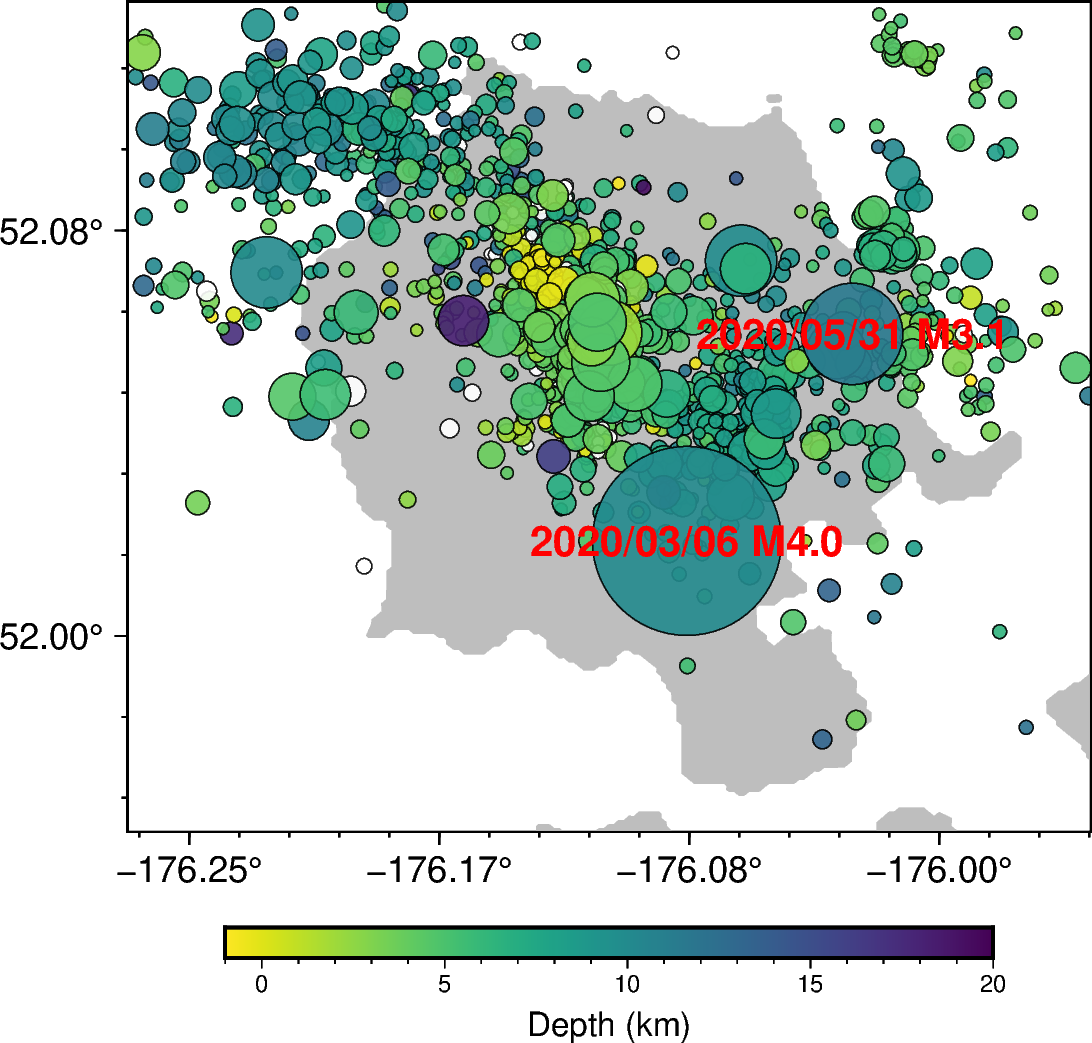

In [108]:
# Set the region for the plot to be slightly larger than the data bounds.
mapproject='M3.2i'
textlist=[]
for i in range(len(databig3)):
    textlist.append(databig3.datetime.values[i].strftime('%Y/%m/%d')+' M'+str(databig3.magnitude.values[i]))

fig = pygmt.Figure()
pygmt.config(MAP_FRAME_TYPE="plain",FORMAT_GEO_MAP="ddd.xx")
fig.basemap(region=region, projection=mapproject, frame=True)
fig.coast(land="grey", water="white")
pygmt.makecpt(cmap="viridis", series=[-1, eq_maxdepth],reverse=True)
fig.plot(
    x=data.longitude,
    y=data.latitude,
    size=0.1 * 2 ** data.magnitude,
    fill=data.depth,
    cmap=True,
    style="cc",
    pen="black",
    transparency=10,
)
fig.colorbar(frame='af+lDepth (km)')

#plot big earthquakes
fig.text(
    text=textlist,
    x=databig3.longitude, 
    y=databig3.latitude, 
    justify="CM", 
    font="10p,Helvetica-Bold,red",
)

fig.show()

fig.savefig('GS_eqks_map_depth.pdf')

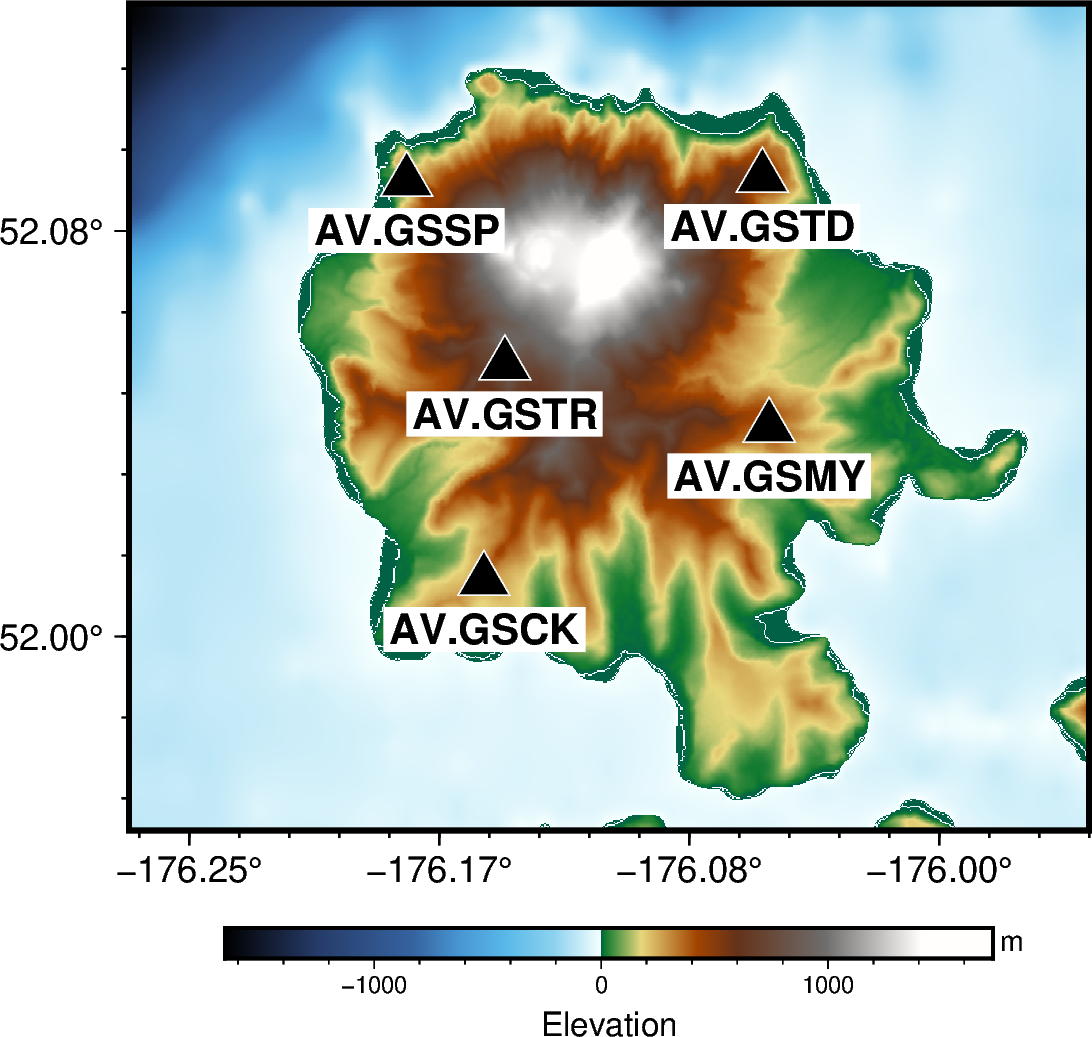

In [122]:
sta_list = ['AV.GSCK','AV.GSMY', 'AV.GSSP','AV.GSTD', 'AV.GSTR']

#Set the Region
fig = pygmt.Figure()
grid = pygmt.datasets.load_earth_relief(resolution="01s", region = region)
pygmt.config(MAP_FRAME_TYPE="plain",FORMAT_GEO_MAP="ddd.xx")

fig.grdimage(grid=grid, projection=mapproject, cmap='geo', frame='af')
fig.plot(x=stainfo.longitude, y=stainfo.latitude, style="i0.18i", fill="black",pen='white')
fig.colorbar(frame=["af", "x+lElevation", "y+lm+s16p"])
fig.text(text=sta_list, x=stainfo.longitude, y=stainfo.latitude-0.01, fill = 'white', font='10p,Helvetica-Bold,black')
fig.show()

fig.savefig('GS_map_sta.pdf')

grdcut [WARNING]: (w - x_min) must equal (NX + eps) * x_inc), where NX is an integer and |eps| <= 0.0001.
grdcut [WARNING]: w reset from -180.13 to -180.133333333
gs: /apps/spack/bell/apps/anaconda/2020.02-py37-gcc-4.8.5-u747gsx/lib/libtiff.so.5: no version information available (required by /lib64/libgs.so.9)


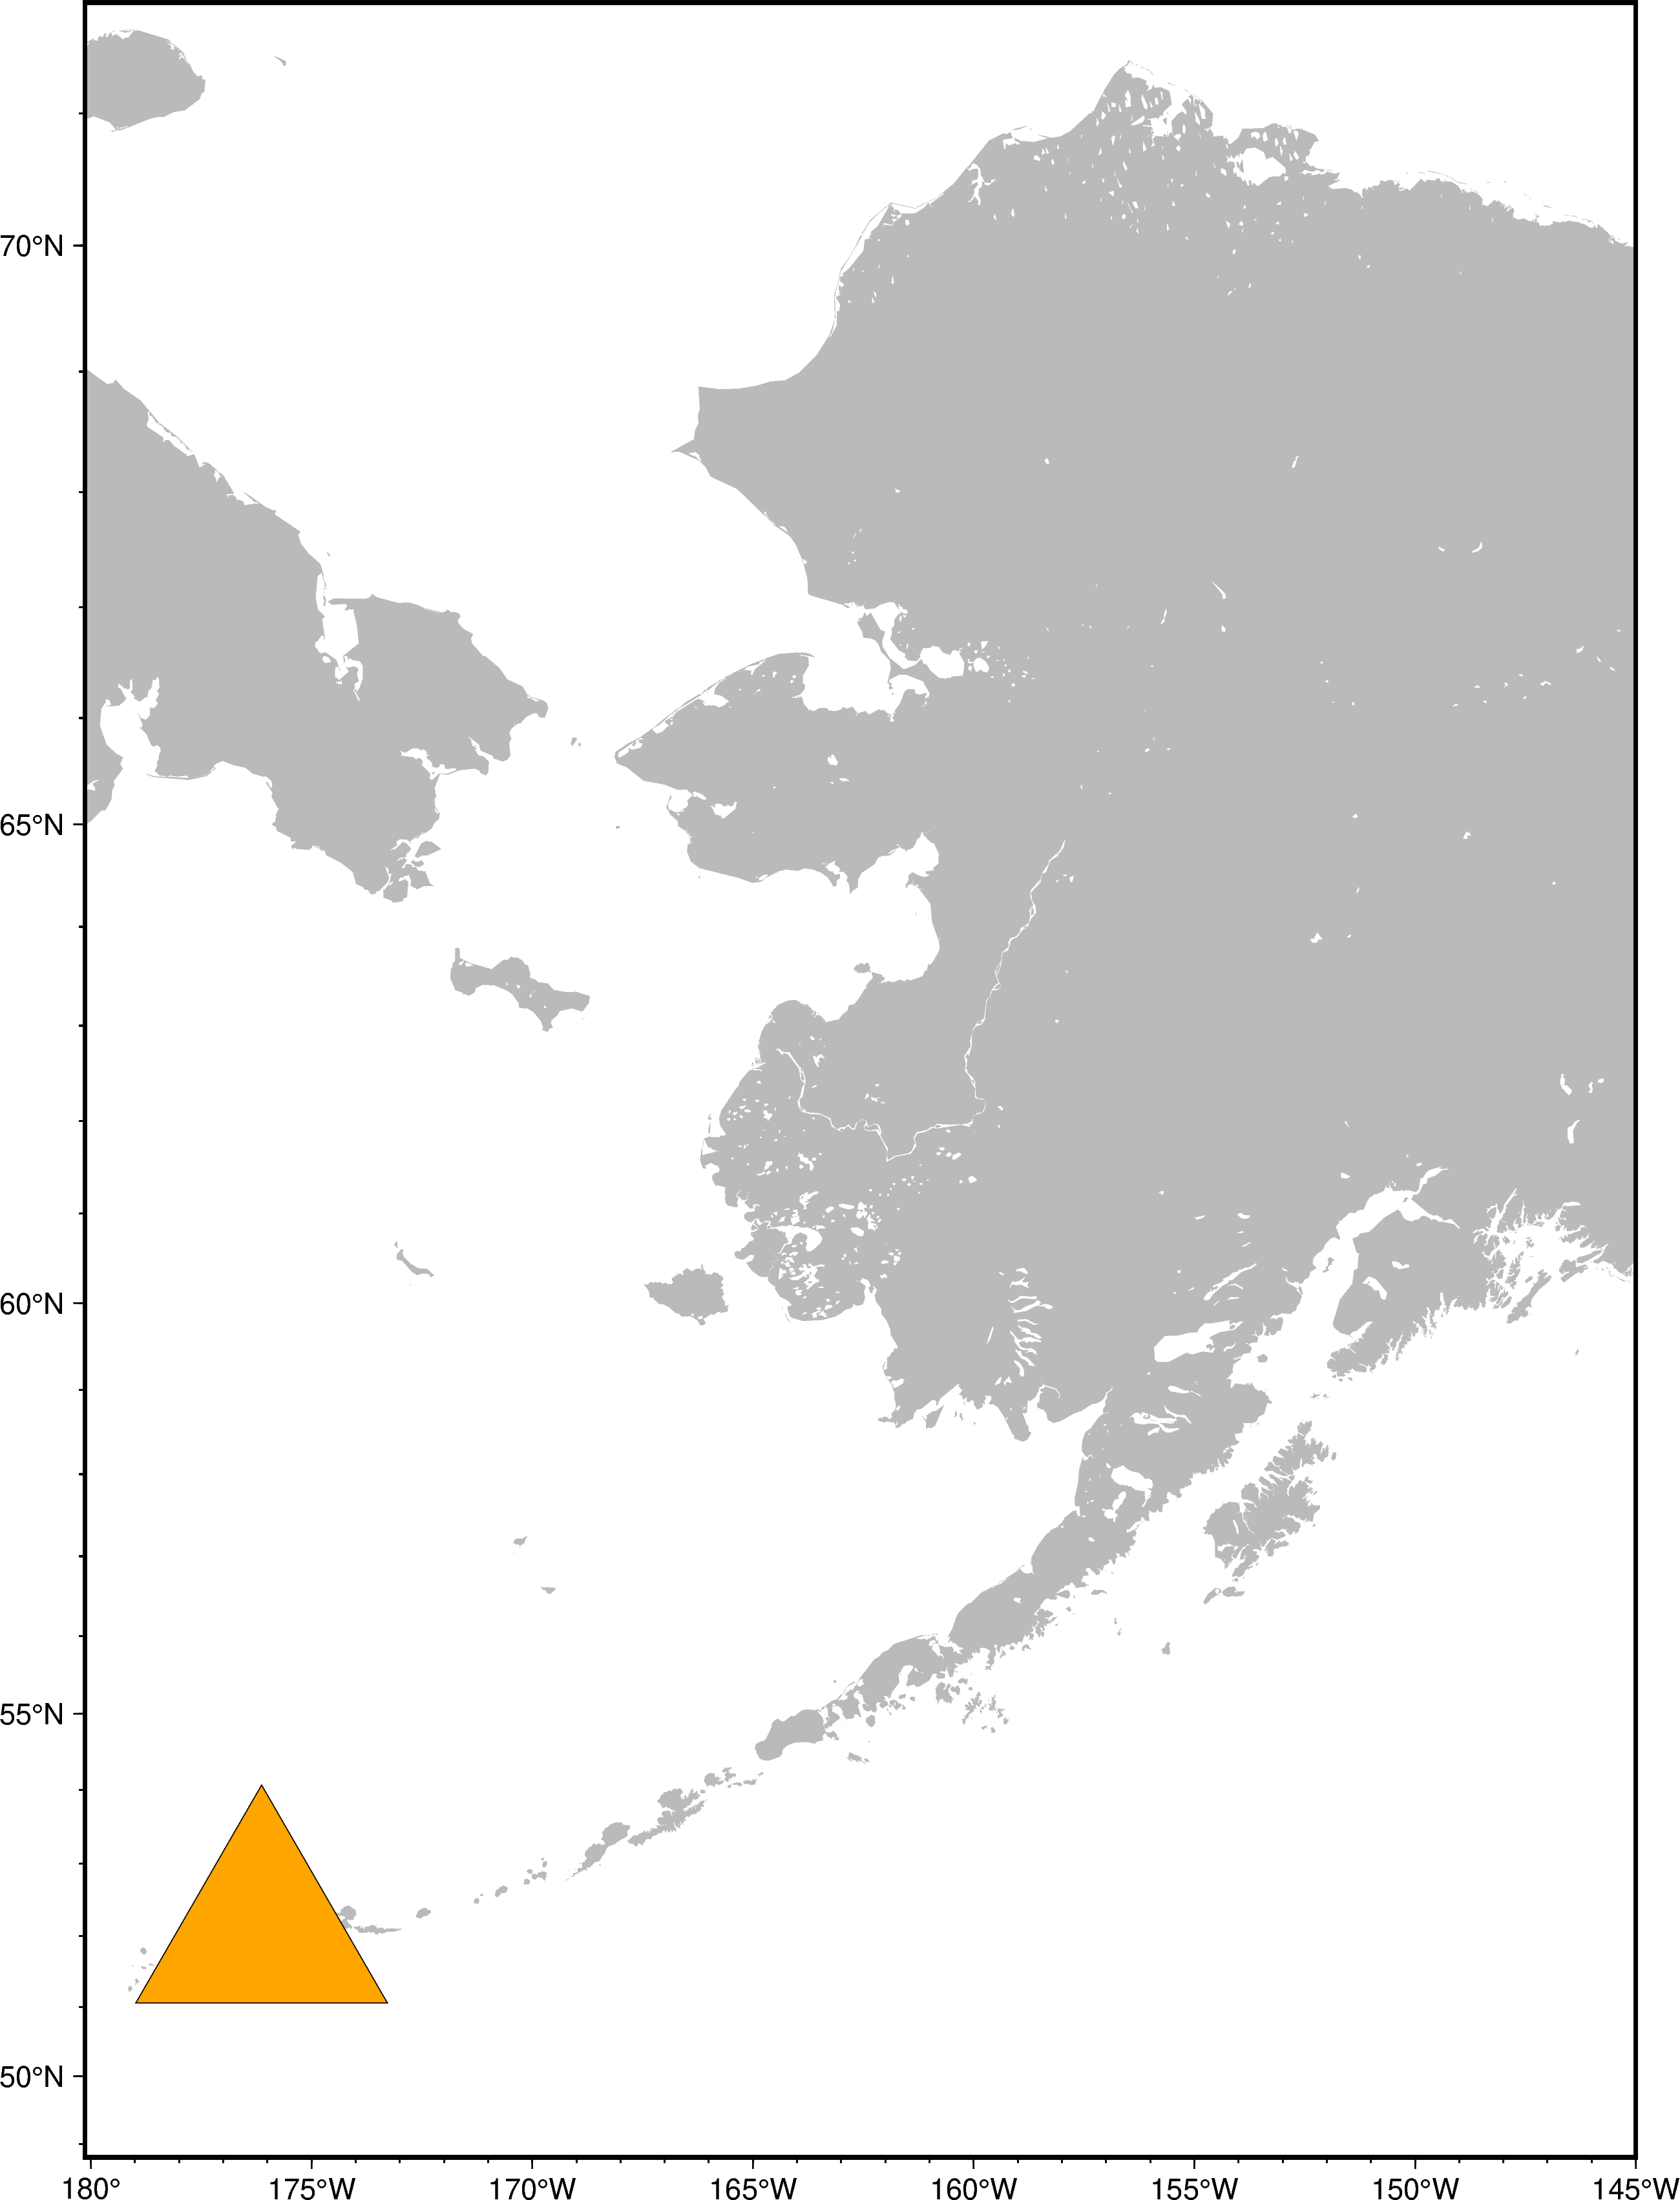

In [14]:
supregion = [-180.13,-145,48.8,71.8]


sta_list = ['AV.GSCK','AV.GSMY', 'AV.GSSP', 'AV.GSTR']

#Set the Region
fig = pygmt.Figure()
grid = pygmt.datasets.load_earth_relief(resolution="15s", region = supregion)

pygmt.config(MAP_FRAME_TYPE="plain")
# pygmt.config(FORMAT_GEO_MAP="ddd.xx")

fig.grdimage(grid=grid, projection='M8i', frame=True)
fig.coast(land="#BABABA", water="#FFFFFF", frame = 'f')
fig.plot(x=-176.130303, y=52.078594, style="t1.5i", color="orange", pen="black")
# fig.text(text='Great Sitkin', x=-176.130303, y=52.078594+4,\
#          fill='white',font="20p,Bookman-Demi,black")
#fig.colorbar(frame=["agf", "x+lElevation", "y+lm"], position = "JTC+o0c/0.5c+w7i/0.2i+h")
fig.basemap(frame="f")


fig.show()
